# Word Cloud

Creating  a "word cloud" from a text file by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary will be the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from this dictionary.

Importing the required libraries.

In [8]:

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys


Opening the text document in the read mode with specified encoding.

In [9]:

file = open('children_of_persia.txt','r',encoding='utf-8')
file_contents = file.read()


Writing a function that iterates through the words in the text file, removes punctuation, and counts the frequency of each word.  Ignoring word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate word cloud!

In [10]:

def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    new_file_contents = "".join((char if char.isalpha() else " ") for char in file_contents).lower().split()
    filter  = [word for word in new_file_contents if word not in list(punctuations) + uninteresting_words]
    frequencies = {word: file_contents.count(word) for word in filter}
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()


WordCloud will generate the image that will be visualized by the function `plt.show()` and function `plt.savefig()`  will save a image on the local disk after running the cell below. 

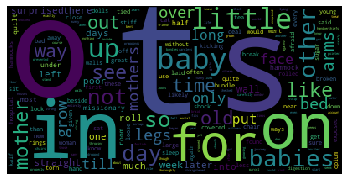

In [23]:
# Display wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.savefig(f'wordcloud.png', dpi = 1000)
plt.show()
